<pre>
<img align="center" width="300" src="https://raw.githubusercontent.com/andrelmfsantos/ppga/master/logo%20uninove.png">
</pre>

<pre>
<img align="center" width="150" src="https://camo.githubusercontent.com/bdc6a3b8963aa99ff57dfd6e1e4b937bd2e752bcb1f1936f90368e5c3a38f670/68747470733a2f2f696d672e736869656c64732e696f2f62616467652f4c6963656e73652d434325323042592d2d5341253230342e302d6c69676874677265792e737667">
</pre>

<h1 style="text-align:center;">Construção de Gráficos com Julia Language Programming</h1>

|                 |              |
|:----------------|:-------------|
|**Universidade:**| Nove de Julho|
|**Programa:**    | PPGI - Programa de Pós Graduação em Informática |
|**Disciplina:**  | Computação Científica com Julia|
|**Professor:**   | José E. Storopoli|
|**Aluno:**       | André L.M.F.Santos|

## Parte 1 - dataframe

In [1]:
# Adicionar Pacotes
#using Pkg
#Pkg.add("CSV"); Pkg.add("DataFrames"); Pkg.add("HTTP"); Pkg.add("Plots"); Pkg.add("PyPlot"); Pkg.add("StatsPlots"); Pkg.add("GLMakie"); Pkg.add("CairoMakie"); Pkg.add("Distributions")

In [2]:
# Usar pacotes
using DataFrames, HTTP, CSV, Dates, Statistics, Plots, StatsPlots, CairoMakie, Distributions

In [3]:
# Ler arquivo csv no github
#using DataFrames, HTTP, CSV
resp = HTTP.request("GET", "https://raw.githubusercontent.com/andrelmfsantos/df/main/TweetsTratados_HBM_DatasetTweets48281Label1.csv?accessType=DOWNLOAD")
data = CSV.read(IOBuffer(String(resp.body)), DataFrame);
first(data,5)

,ID,DATE,HASHTAGS,USER9ID,USERNAME
,String31,String31,String,String31,String15
1,1338262133637836801,2020-12-13 20:18:51,[],286944861,mlgaldino
2,1343907450030878720,2020-12-29 10:11:19,[],592762484,Tiolunerdweek
3,1247513631920717825,2020-04-07 10:16:42,[],43002988,marcospaulodj
4,1247390197790248963,2020-04-07 02:06:13,[],529741713,faela8520
5,1236304898167394305,2020-03-07 11:57:11,[],1109654103913873408,sabrinantunesoa


In [4]:
# Subset com variáveis de interesse
df = select(data, :DATE, :N9SYMPTOMS, :N9FOLLOWERS, :N9FRIENDS);
colnames = ["period", "symptoms","followers","friends"]
rename!(df, Symbol.(colnames))
last(df,5)

,period,symptoms,followers,friends
,String31,Int64,Int64?,Int64?
1,2020-05-11 10:32:04,1,1452,2083
2,2020-09-07 19:52:57,1,missing,missing
3,2020-08-15 07:50:38,1,11,77
4,2020-03-23 17:35:53,2,169,685
5,2020-06-19 22:57:01,1,426,429


In [5]:
# Remove dados faltantes
df = dropmissing(df, :)
last(df,5)

,period,symptoms,followers,friends
,String31,Int64,Int64,Int64
1,2020-03-29 16:34:37,1,729,616
2,2020-05-11 10:32:04,1,1452,2083
3,2020-08-15 07:50:38,1,11,77
4,2020-03-23 17:35:53,2,169,685
5,2020-06-19 22:57:01,1,426,429


In [6]:
# Transformar series "period" em datetime
df.period = Date.(df.period, "yyyy-mm-dd HH:MM:SS")
first(df,5)

,period,symptoms,followers,friends
,Date,Int64,Int64,Int64
1,2020-12-13,1,293,286
2,2020-12-29,1,212,483
3,2020-04-07,1,651,259
4,2020-04-07,1,3121,4264
5,2020-03-07,1,277,235


In [7]:
# Criar coluna mês
df = transform(df, :period => ByRow(month) => :mes)
# Remover a coluna "period"
df = select(df, Not(:period))
first(df,5)

,symptoms,followers,friends,mes
,Int64,Int64,Int64,Int64
1,1,293,286,12
2,1,212,483,12
3,1,651,259,4
4,1,3121,4264,4
5,1,277,235,3


In [8]:
# Agrupar colunas pela soma (followers, friends)
gdf = groupby(df, :mes)
sdf = combine(gdf, [:symptoms, :followers, :friends] .=> sum; renamecols=false)
sdf

,mes,symptoms,followers,friends
,Int64,Int64,Int64,Int64
1,1,2792,3706058,1475869
2,2,3237,11682131,1775640
3,3,15776,60596272,8210803
4,4,9516,58193947,5767508
5,5,7420,11607674,4283704
6,6,4803,9583552,3393692
7,7,4927,9251812,4431732
8,8,3889,6811629,3690393
9,9,3096,6604525,2417270


## Parte 2 - plots

In [9]:
#import Pkg
#Pkg.add("GLMakie"); Pkg.add("CairoMakie"); Pkg.add("Distributions")

In [10]:
#using CairoMakie, Distributions

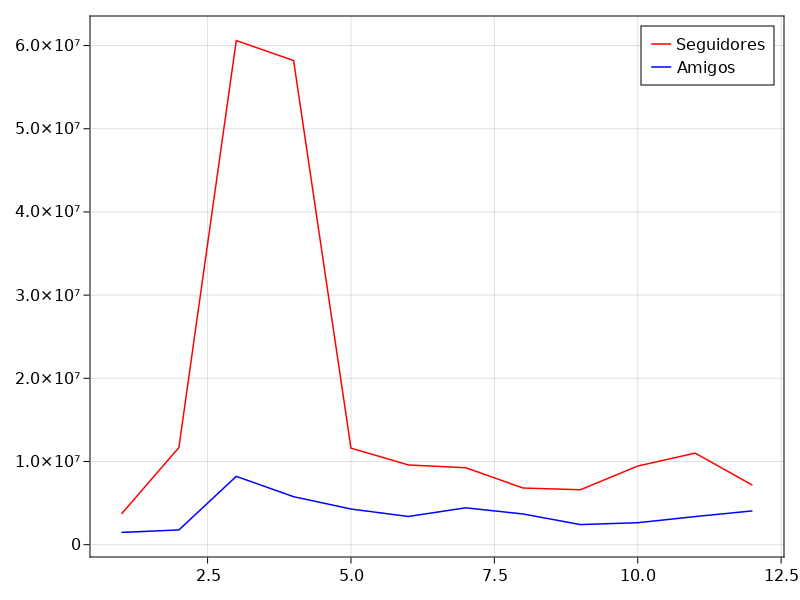

In [11]:
#using CairoMakie

x = sdf.mes
y1 = sdf.followers
y2 = sdf.friends

lines(x, y1, color = :red, markersize = 5, label = "Seguidores")
lines!(x, y2, color = :blue, markersize = 10, label = "Amigos")
axislegend()
current_figure()

In [12]:
# Base para histograma
println(nrow(data))
dh = select(data, :DATE, :N9SYMPTOMS, :N9FOLLOWERS, :N9FRIENDS)
colnames = ["period", "symptoms","followers","friends"]
rename!(dh, Symbol.(colnames))
dh = dropmissing(dh, :)
println(nrow(dh))
# Transformar series "period" em datetime
dh.period = Date.(dh.period, "yyyy-mm-dd HH:MM:SS")
# Criar coluna mês
dh = transform(dh, :period => ByRow(month) => :mes)
dh = transform(dh, :period => ByRow(dayofweek) => :DiaSemana)
dh = transform(dh, :period => ByRow(dayofmonth) => :DiaMes)
first(dh,5)

48281
45874


,period,symptoms,followers,friends,mes,DiaSemana,DiaMes
,Date,Int64,Int64,Int64,Int64,Int64,Int64
1,2020-12-13,1,293,286,12,7,13
2,2020-12-29,1,212,483,12,2,29
3,2020-04-07,1,651,259,4,2,7
4,2020-04-07,1,3121,4264,4,2,7
5,2020-03-07,1,277,235,3,6,7


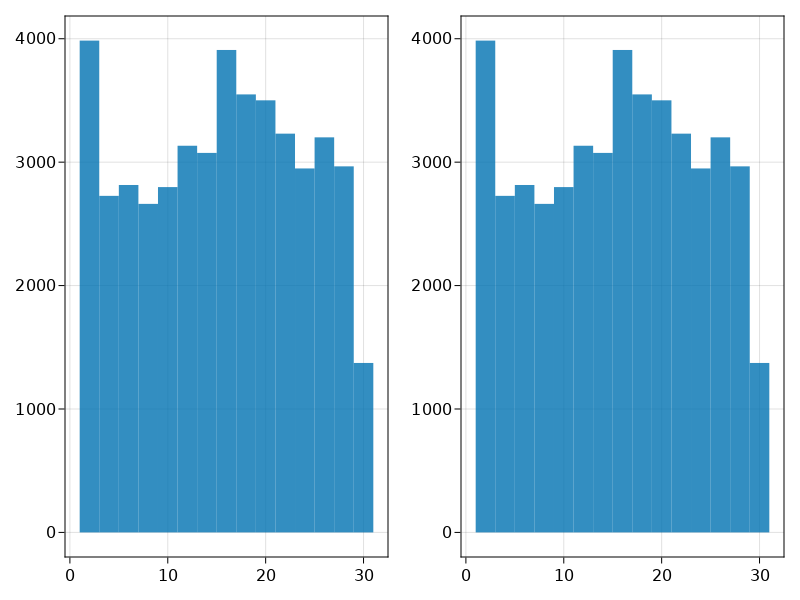

In [13]:
#using CairoMakie

x = dh.DiaMes

w = pdf.(Normal(), x)

fig = Figure()
hist(fig[1,1], x)
hist(fig[1,2], x, weights = w)

fig

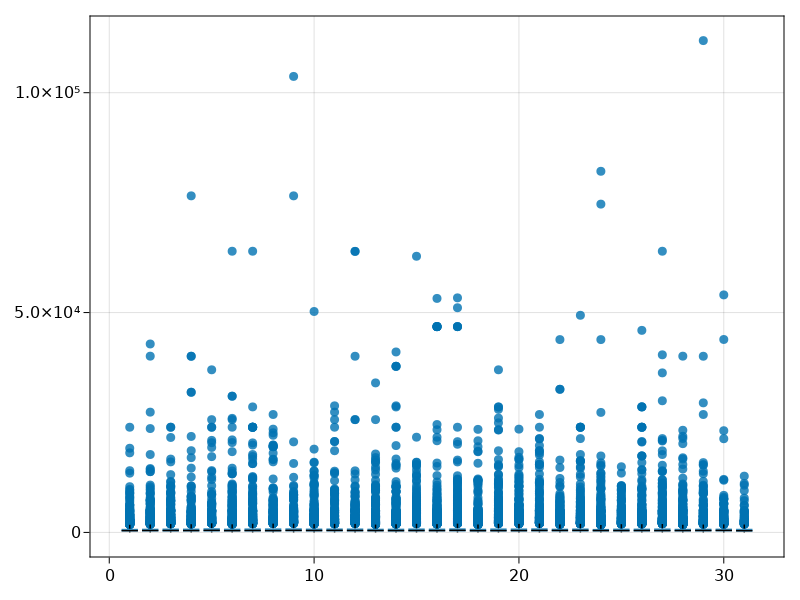

In [14]:
# Boxplot
#using CairoMakie

xs = dh.DiaMes
ys = dh.friends

CairoMakie.boxplot(xs, ys)

In [15]:
"""
@df dh StatsPlots.corrplot(
    cols([:DiaMes, :followers, :friends]);
    size=(800,600),
    plot_title="Correlation Plot"
)
"""

"@df dh StatsPlots.corrplot(\n    cols([:DiaMes, :followers, :friends]);\n    size=(800,600),\n    plot_title=\"Correlation Plot\"\n)\n"

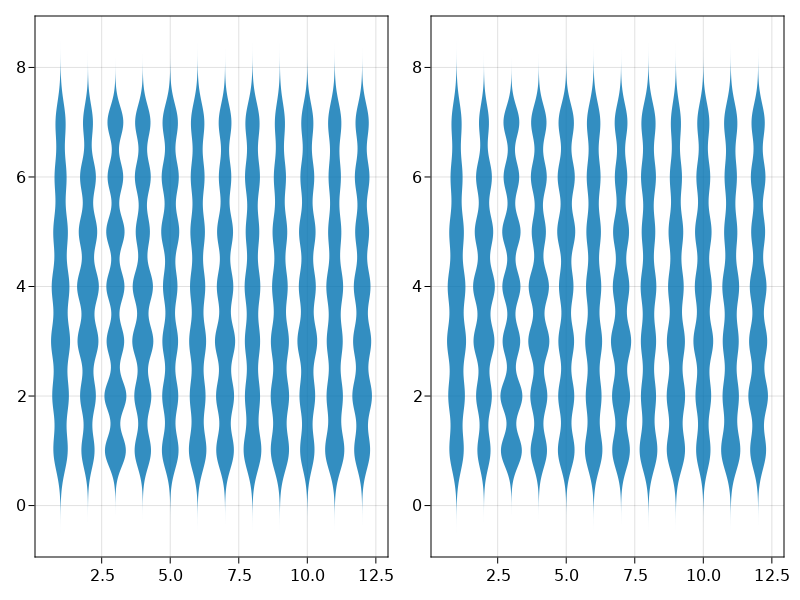

In [16]:
#using CairoMakie, Distributions

x = dh.mes
y = dh.DiaSemana

w = pdf.(Normal(), x .- y)

fig = Figure()

CairoMakie.violin(fig[1,1], x, y)
CairoMakie.violin(fig[1,2], x, y, weights = w)

fig

**Referências:**
* [Julia - Database Packages](https://juliapackages.com/c/database)
*[Makie](https://makie.juliaplots.org/stable/examples/plotting_functions/violin/)